In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2
import trackpy as tp
from matplotlib import cm
import plotly.plotly as py
from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt



/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import numpy as np
np.version.version

'1.15.0'

In [5]:
from skimage import data

In [6]:
import cv2
print(cv2.__version__)

3.4.0


In [7]:

from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray


In [8]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims



In [7]:
#image = frames[100*10]
#image_gray = rgb2gray(image)
#start = timer()
#blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)
#end = timer()
#y=blobs_doh[:,0]
#x=blobs_doh[:,1]
#r=blobs_doh[:,2]
#plt.scatter(x,y,alpha=0.2,s=100)
#plt.imshow(image)

In [9]:
# get the frame number of video
cap = cv2.VideoCapture("Video 1.MP4")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

1116


In [83]:
frames=pims.Video('Video 1.mp4')
# first three minutues
#frames=frames[9300:9300+18000]

In [84]:
frames=frames[400:]
w,l,_=frames[1].shape

116392437

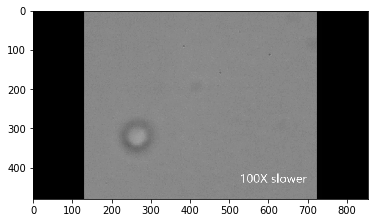

In [81]:
test=cv2.cvtColor(frames[55], cv2.COLOR_BGR2GRAY)
plt.imshow(test)

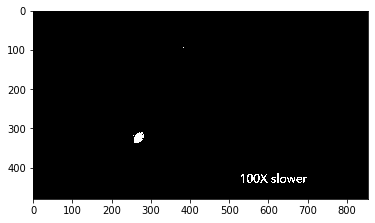

In [82]:
thresh = 150
im_bw = cv2.threshold(test, thresh, 255, cv2.THRESH_BINARY)[1]
plt.imshow(im_bw)

In [91]:
new_frame=np.zeros((len(frames),w, l))

In [92]:
thresh = 150
for i in range(len(frames)-1):
    test=cv2.cvtColor(frames[i]+1, cv2.COLOR_BGR2GRAY)
    new_frame[i] = cv2.threshold(test, thresh, 255, cv2.THRESH_BINARY)[1]
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700


In [93]:
what=[np.sum(new_frame[i].flatten()) for i in range(700)]

([], <a list of 0 Text yticklabel objects>)

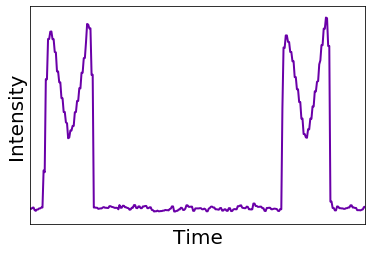

In [131]:
font = {'family' : 'normal',
       # 'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)
plt.figure()
ax=plt.subplot()
plt.plot(what,'-',linewidth=2, alpha=1,color=cm.plasma(0.2))
plt.xlabel('Time',fontsize=20)
plt.ylabel('Intensity',fontsize=20)
plt.xlim(0,300)
plt.xticks([])
plt.yticks([])
#plt.ylim(0,0.4)

In [196]:
import trackpy as tp
from matplotlib import cm

In [197]:
start = timer()
f = tp.locate(new_frame[100],17, invert=True,minmass=1000)
end = timer()
print(end - start)

0.24525229498976842


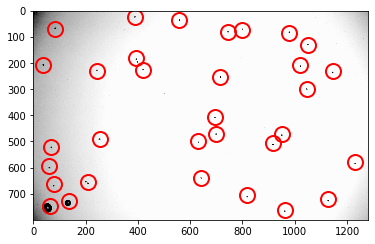

In [198]:
plt.figure()  # make a new figure
tp.annotate(f, new_frame[101]);

In [199]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep
9,25.083059,388.347984,4439.298590,2.450231,0.043471,169.767259,-40433.0,0.008292
24,35.046659,558.377174,4725.060673,2.436880,0.052922,182.826279,-43017.0,0.011632
48,68.685637,84.402420,3428.376814,2.498397,0.027264,123.676600,-28574.0,0.003577
51,72.269345,799.783784,4149.695619,2.363293,0.057909,167.462726,-43921.0,0.013541
65,82.221478,744.725911,3898.501531,2.363057,0.076141,158.244594,-44274.0,0.014467


(array([28.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([2.28659433, 2.55570578, 2.82481722, 3.09392866, 3.3630401 ,
        3.63215154, 3.90126298, 4.17037443, 4.43948587, 4.70859731,
        4.97770875]),
 <a list of 10 Patch objects>)

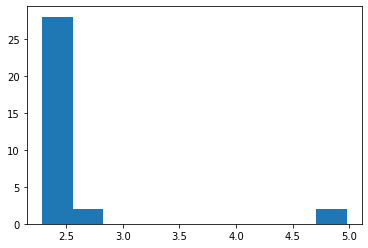

In [200]:
plt.hist(f['size'])

In [ ]:
f = tp.batch( new_frame, 17, invert=True,minmass=900,maxsize=4.5);

Frame 373: 33 features


In [178]:
t = tp.link_df(f,20, memory=5)

In [179]:
t_ref = tp.filter_stubs(t, 200)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t_ref['particle'].nunique())
print('After:', t_ref['particle'].nunique())

Before: 22
After: 22


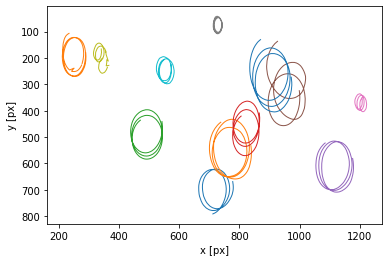

In [182]:
#t_L1=t1
plt.figure()
tp.plot_traj(t_ref);


In [109]:
list(set(t_ref['particle'].values))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 89,
 94,
 110,
 127]

In [56]:
#t_3L1['particle'].replace(1, 27,inplace=True)

In [183]:
t_ref.to_csv("oval.csv",encoding='utf-8')


In [134]:
t1=t_ref
posi=t1.loc[t1['particle'] == int(2)][['x','y']]
np.linalg.norm((posi.iloc[1]-posi.iloc[0]).values)

1.3398938407077716

In [181]:
# delete particle is not moving
t1=t_ref
l=list(set(np.sort(t1['particle'].values)))
for i, value in enumerate(l):
    posi=t1.loc[t1['particle'] == int(value)][['x','y']]
    if (np.linalg.norm((posi.iloc[1]-posi.iloc[0]).values))<1:
        t1 = t1[t1.particle!=int(value) ]
t_ref=t1

In [5]:
import pandas as pd

In [522]:
t_reference=pd.read_csv('reference_horinontal.csv')
t_L1=pd.read_csv('Lleft01.csv')
t_L2=pd.read_csv('Lleft02.csv')
t_3L1=pd.read_csv('3Lleft01.csv')
t_3L2=pd.read_csv('3Lleft02.csv')

In [531]:
def velocity(input):
    t1=input
    fps=2
    scale=0.87
    velocity_me=[]
    for i in set(t1['particle'].values):

        net=np.linalg.norm(np.diff(t1.loc[t1['particle']==i][['x','y']].values,axis=0),axis=1)* fps*scale
        net2=[np.sum(net[:j])/fps for j in range(1,len(net))]
        #realframes=np.argmax(np.gradient(net2, 2)<0.09)
        #if  realframes==0:
           # realframes=t1['frame'].max()
        realframes=t1['frame'].max()
        distance=net2[-1]
        velocity_me.append(distance/((realframes+1)/fps))
    return [net,net2, velocity_me]

array([[483.01293019, 482.95445216, 483.62708436, ..., 447.90756657,
        447.73061682, 447.58415671],
       [424.42522124, 416.55810771, 408.42550567, ..., 555.66287496,
        547.71691937, 539.53294957]])

(0, 0.4)

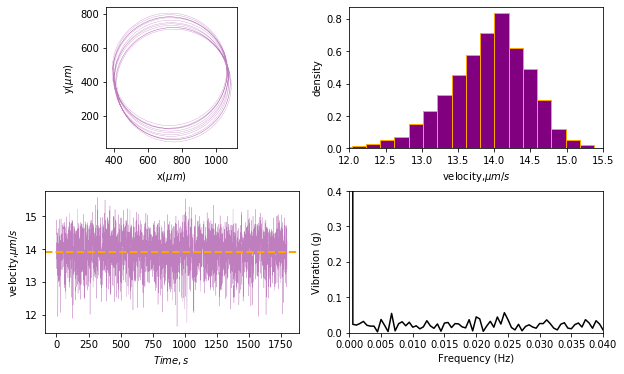

In [655]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_reference[['x']].values*scale,t_reference[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_reference)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
plt.xlim(12,15.5)

ax3=plt.subplot(223)
plt.plot(np.arange(3600)/2,velocity(t_reference)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.axhline(y=velocity(t_reference)[2], linewidth=2, color="orange",linestyle='dashed')
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_reference)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_reference)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)


(0, 0.4)

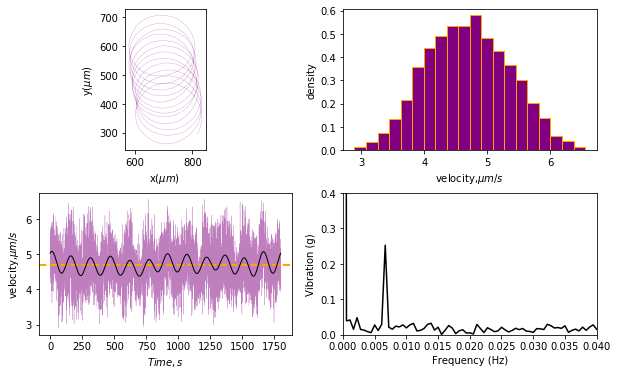

In [704]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_L1[['x']].values*scale,t_L1[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_L1)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
#plt.xlim(12,15.5)

rft = np.fft.rfft(velocity(t_L1)[0])
rft[15:] = 0   # Note, rft.shape = 21
y_smooth = np.fft.irfft(rft)


####
ax3=plt.subplot(223)
plt.plot(np.arange(3600)/2,velocity(t_L1)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.axhline(y=velocity(t_L1)[2], linewidth=2, color="orange",linestyle='dashed')
plt.plot( np.arange(3600)/2,y_smooth, label='Smoothed',color='black',alpha=1,linewidth=1)
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_reference)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_L1)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)



(0, 0.4)

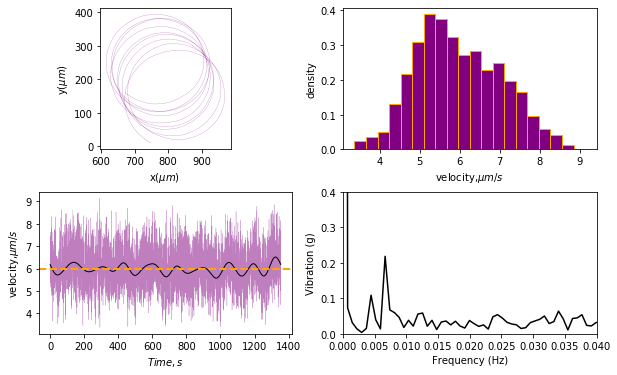

In [715]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_3L2[['x']].values*scale,t_3L2[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_3L2)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
#plt.xlim(12,15.5)
rft = np.fft.rfft(velocity(t_3L2)[0])
rft[15:] = 0   # Note, rft.shape = 21
y_smooth = np.fft.irfft(rft)
###
ax3=plt.subplot(223)
plt.plot(np.arange(2708)/2,velocity(t_3L2)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.plot( np.arange(2708)/2,y_smooth, label='Smoothed',color='black',alpha=1,linewidth=1)
plt.axhline(y=velocity(t_3L2)[2], linewidth=2, color="orange",linestyle='dashed')
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_3L2)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_3L2)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)



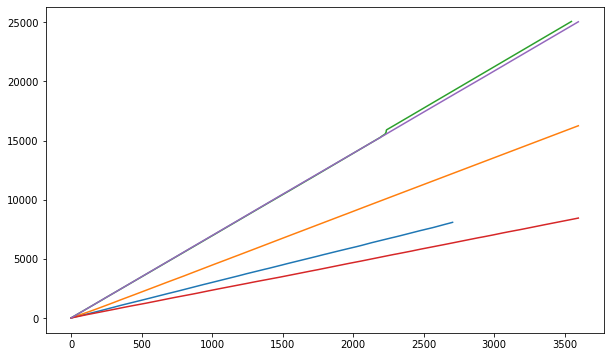

In [532]:
plt.plot(velocity(t_3L2)[1])
plt.plot(velocity(t_3L1)[1])
plt.plot(velocity(t_L2)[1])
plt.plot(velocity(t_L1)[1])
plt.plot(velocity(t_reference)[1])

(0, 2000)

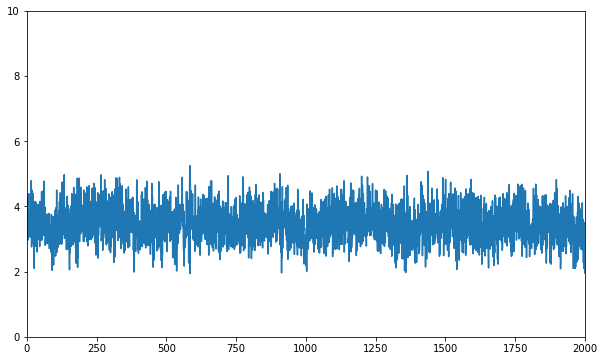

In [506]:
#plt.plot(net_reference)
#plt.plot(net)
#plt.plot(net_L2)
#plt.plot(net_3L1)
plt.plot(net_3L2)
plt.ylim(0,10)
plt.xlim(0,2000)


In [607]:
dx_dt = np.gradient(trac[:, 0])
dy_dt = np.gradient(trac[:, 1])
velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])

In [530]:
fps=1
scale=3600/1636
velocity_me=[]
for i in set(t1['particle'].values):
    
    net=np.linalg.norm(np.diff(t1.loc[t1['particle']==i][['x','y']].values,axis=0),axis=1)
    net2=[np.sum(net[:i]) for i in range(1,len(net))]
    #realframes=np.argmax(np.gradient(net2, 2)<0.09)
    #if  realframes==0:
       # realframes=t1['frame'].max()
    realframes=t1['frame'].max()
    distance=net2[-1]
    velocity_me.append(distance*scale/((realframes+1)/fps))

In [535]:
t1['frame'].max()

179

In [307]:
t1.to_csv('electric.csv', encoding='utf-8')

In [539]:
np.mean(velocity_me)
np.std(velocity_me)

1.914308372703426

In [541]:
np.mean(velocity_magnetic)
np.std(velocity_magnetic)

0.6854351710047306

In [542]:
np.mean(velocity_electric)
np.std(velocity_electric)

0.8325345893051683

In [121]:
import matplotlib
font = {'family' : 'normal',
       # 'weight' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)
mean=np.array([np.mean(velocity_magnetic),np.mean(velocity_electric),np.mean(velocity_me)])*(3600/1636)
std=np.array([np.std(velocity_magnetic),np.std(velocity_electric),np.std(velocity_me)])*(3600/1636)
ind = ['magnetic','electric','magnetic+electric']
width = 0.4  
plt.bar(ind, mean, width, yerr=std, color=[(4/255,30/255,66/255)],ecolor=[(255/255,165/255,0)]\
        ,edgecolor=[(255/255,165/255,0)],linewidth=2)
plt.ylabel('velocity ''$\mu m/s$'' ',fontsize=20)

NameError: name 'velocity_magnetic' is not defined